In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("sparkml").getOrCreate()

In [3]:
spark

In [4]:
agg = spark.read.parquet('s3://502pubg/clean/aggeragate0.parquet')

In [5]:
agg.printSchema()

root
 |-- game_size: integer (nullable = true)
 |-- match_mode: string (nullable = true)
 |-- party_size: integer (nullable = true)
 |-- player_assists: integer (nullable = true)
 |-- player_dbno: integer (nullable = true)
 |-- player_dist_ride: integer (nullable = true)
 |-- player_dist_walk: integer (nullable = true)
 |-- player_dmg: integer (nullable = true)
 |-- player_kills: integer (nullable = true)
 |-- player_survive_time: integer (nullable = true)
 |-- team_placement: integer (nullable = true)



In [6]:
from pyspark.sql.functions import countDistinct

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [69]:
hist1 = agg.select('game_size').rdd.flatMap(lambda row: row).histogram(100)

In [70]:
hist1

([1.0,
  1.99,
  2.98,
  3.9699999999999998,
  4.96,
  5.95,
  6.9399999999999995,
  7.93,
  8.92,
  9.91,
  10.9,
  11.89,
  12.879999999999999,
  13.87,
  14.86,
  15.85,
  16.84,
  17.83,
  18.82,
  19.81,
  20.8,
  21.79,
  22.78,
  23.77,
  24.759999999999998,
  25.75,
  26.74,
  27.73,
  28.72,
  29.71,
  30.7,
  31.69,
  32.68,
  33.67,
  34.66,
  35.65,
  36.64,
  37.63,
  38.62,
  39.61,
  40.6,
  41.589999999999996,
  42.58,
  43.57,
  44.56,
  45.55,
  46.54,
  47.53,
  48.519999999999996,
  49.51,
  50.5,
  51.49,
  52.48,
  53.47,
  54.46,
  55.45,
  56.44,
  57.43,
  58.42,
  59.41,
  60.4,
  61.39,
  62.38,
  63.37,
  64.36,
  65.35,
  66.34,
  67.33,
  68.32,
  69.31,
  70.3,
  71.29,
  72.28,
  73.27,
  74.26,
  75.25,
  76.24,
  77.23,
  78.22,
  79.21,
  80.2,
  81.19,
  82.17999999999999,
  83.17,
  84.16,
  85.15,
  86.14,
  87.13,
  88.12,
  89.11,
  90.1,
  91.09,
  92.08,
  93.07,
  94.06,
  95.05,
  96.03999999999999,
  97.03,
  98.02,
  99.01,
  100],
 [3,
  1

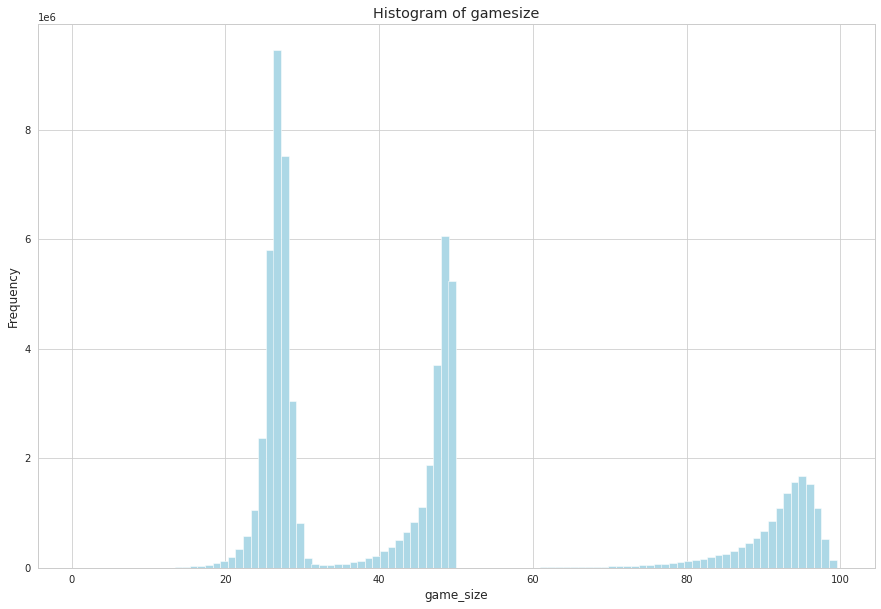

In [77]:
data = {
'bins': hist1[0][:-1],
'freq': hist1[1]
}
plt.figure(figsize=(15,10))
plt.bar(data['bins'], data['freq'],width=1,color='lightblue')
plt.xlabel('game_size')
plt.ylabel('Frequency')
plt.title('Histogram of gamesize')
plt.show()

In [79]:
hist2 = agg.select('team_placement').rdd.flatMap(lambda row: row).histogram(20)

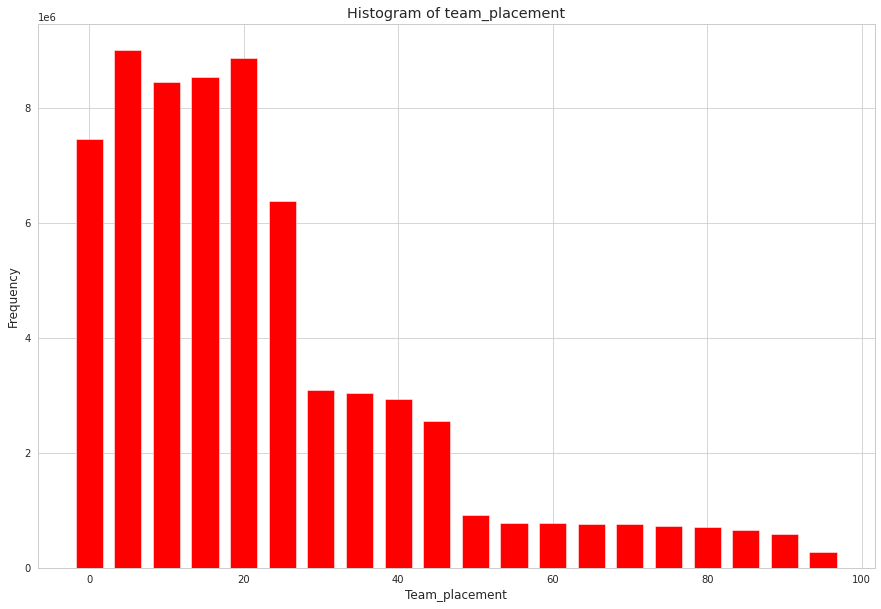

In [80]:
data = {
'bins': hist2[0][:-1],
'freq': hist2[1]
}
plt.figure(figsize=(15,10))
plt.bar(data['bins'], data['freq'],width=3.5,color='red')
plt.xlabel('Team_placement')
plt.ylabel('Frequency')
plt.title('Histogram of team_placement')
plt.show()

In [65]:
agg.select(countDistinct('match_mode')).show()

+--------------------------+
|count(DISTINCT match_mode)|
+--------------------------+
|                         1|
+--------------------------+



In [30]:
df1 = agg.select('party_size','player_survive_time').toPandas()

In [51]:
df2=df1[df1['player_survive_time']<5000]

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np

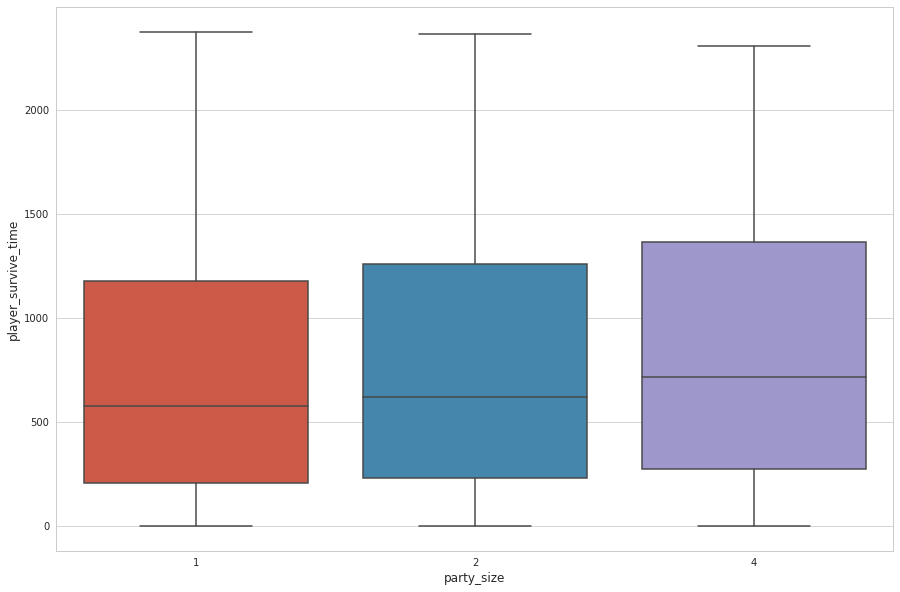

In [54]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid") 
sns.boxplot(x='party_size',y='player_survive_time',data=df2)
plt.show()

In [86]:
kill = spark.read.parquet('s3://502pubg/clean/kill1.parquet')

In [87]:
kill.printSchema()

root
 |-- killed_by: string (nullable = true)
 |-- killer_placement: double (nullable = true)
 |-- killer_position_x: integer (nullable = true)
 |-- killer_position_y: integer (nullable = true)
 |-- map: string (nullable = true)
 |-- time: integer (nullable = true)
 |-- victim_placement: double (nullable = true)
 |-- victim_position_x: integer (nullable = true)
 |-- victim_position_y: integer (nullable = true)
 |-- DIST: double (nullable = true)
 |-- weaponindex: double (nullable = true)
 |-- mapindex: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- stdfeatures: vector (nullable = true)



In [95]:
dfkill = kill.select('weaponindex','time').toPandas()

In [96]:
dfkill

,weaponindex,time
0,2.0,856
1,0.0,794
2,21.0,1123
3,0.0,190
4,7.0,721
...,...,...
58923971,12.0,170
58923972,4.0,1131
58923973,7.0,1799
58923974,8.0,86


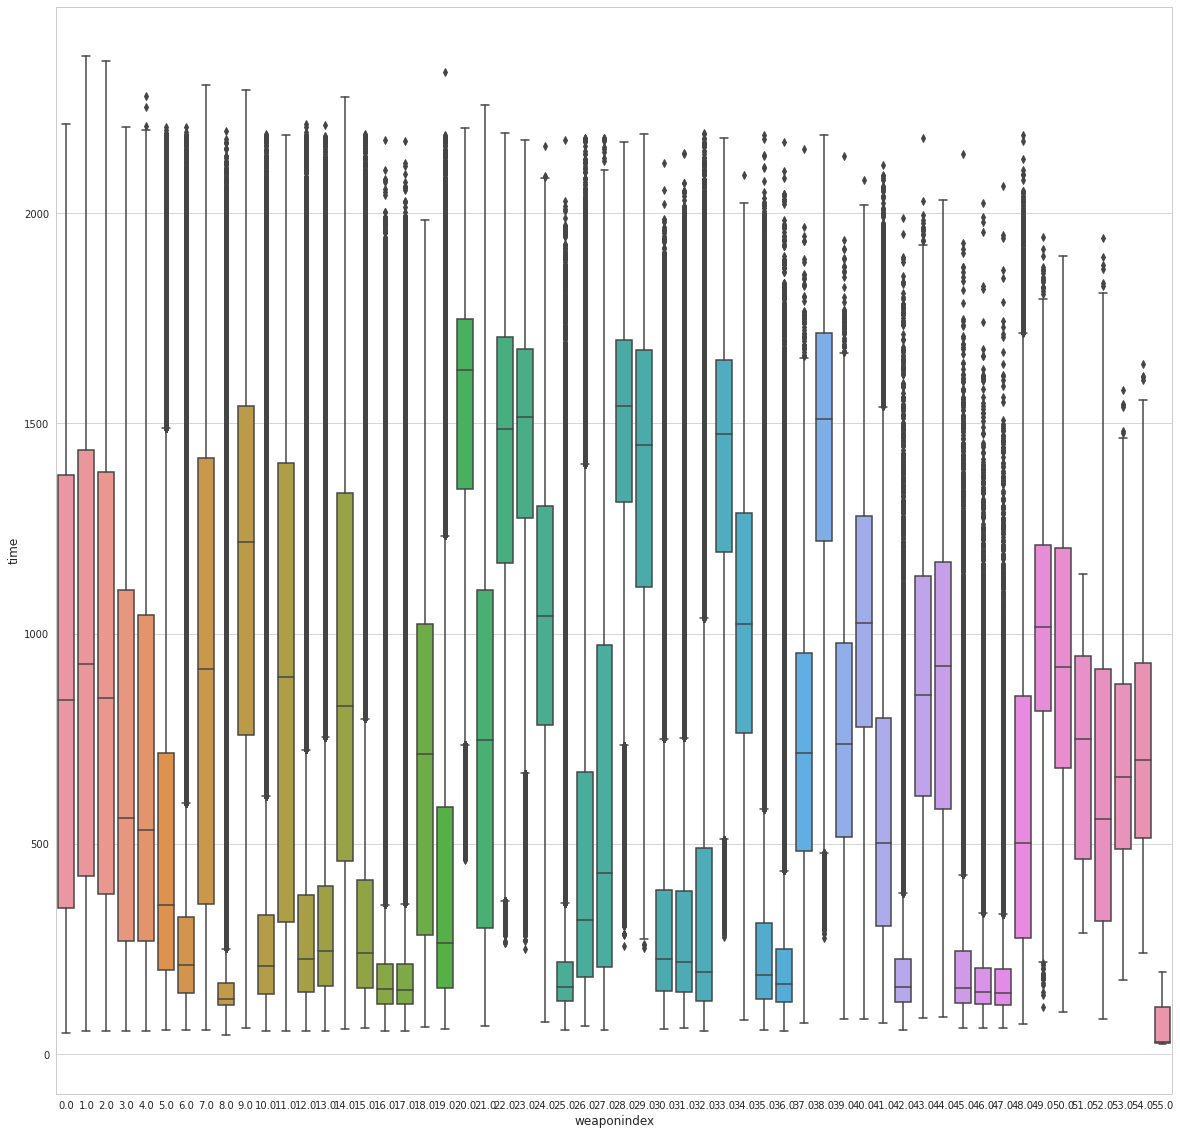

In [98]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid") 
sns.boxplot(x='weaponindex',y='time',data=dfkill)
plt.show()

In [99]:
time = kill.select('time').toPandas()

Text(0.5, 1.0, 'Density plot of time')

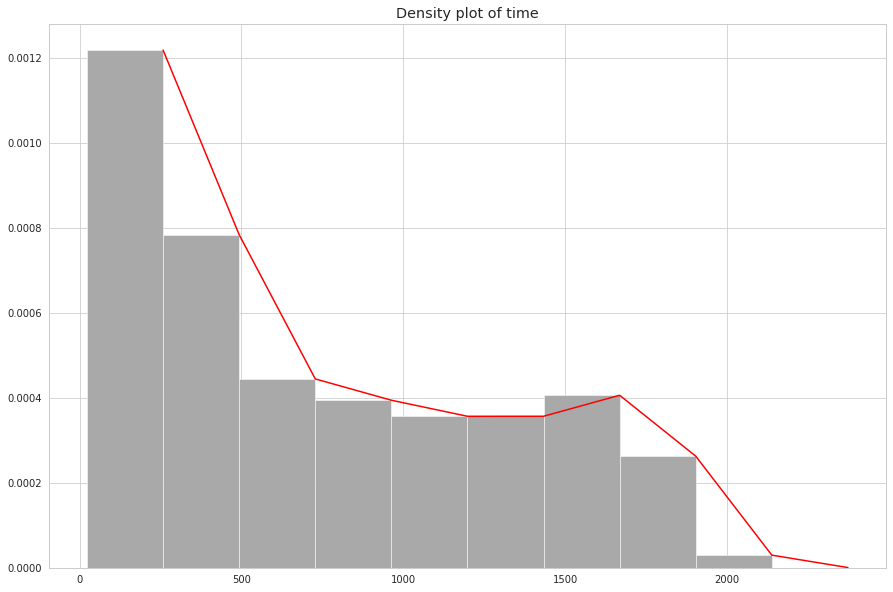

In [126]:
plt.figure(figsize=(15,10))
a=plt.hist(time['time'],density=True,color='darkgrey')
plt.plot(a[1][1:],a[0],color='red')
plt.title('Density plot of time')